In [30]:
import sklearn.linear_model as lm, pandas as pd, matplotlib.pyplot as plt, numpy as np

In [9]:
df = pd.DataFrame(
    {
    'jam_rating':[2,4,7,8,9],
    'jam_price':[1,2,3,4,5]
    }
)

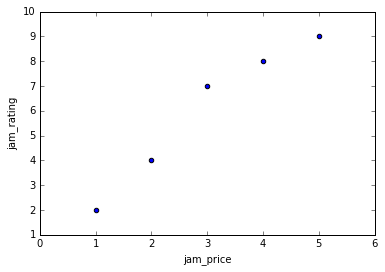

In [10]:
%matplotlib inline
df.plot.scatter('jam_price','jam_rating')

<h1>RANSAC</h1>

In [11]:
ransac = lm.RANSACRegressor()

In [13]:
ransac.fit(df[['jam_price']],df['jam_rating'])

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

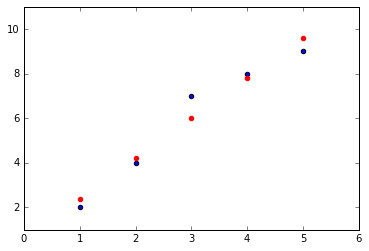

In [21]:
plt.scatter(df['jam_price'], df['jam_rating'])
plt.scatter(df['jam_price'], ransac.predict(df[['jam_price']]), color='red')

<h1>Multiple Linear Regression</h1>

In [152]:
# Read in realEstate.csv as a data frame
sacr = pd.read_csv('../../DSI-SYD-1/classes/week-02/3.2-lab/assets/datasets/Sacramentorealestatetransactions.csv')

In [154]:
import matplotlib.cm as cm, seaborn

def makebins(df, attr, bins):

    step = (df[attr].min()- df[attr].max())/bins
    temp = df
    hi = attr + '_rounded'
    temp[hi] = (df[attr] / step).apply(int) * step
    return temp

sacr2 = makebins(sacr,'latitude',20)
sacr2 = makebins(sacr2,'longitude',20)


#binspace = sacr['latitude'].min(), sacr['latitude'].max(), 10)
#np.digitize(df[attr], 10)

#makebins(sacr,'latitude',10)

res = sacr2.groupby(['latitude_rounded', 'longitude_rounded'])[['price']].agg({'price':{'avgprice':np.mean}})

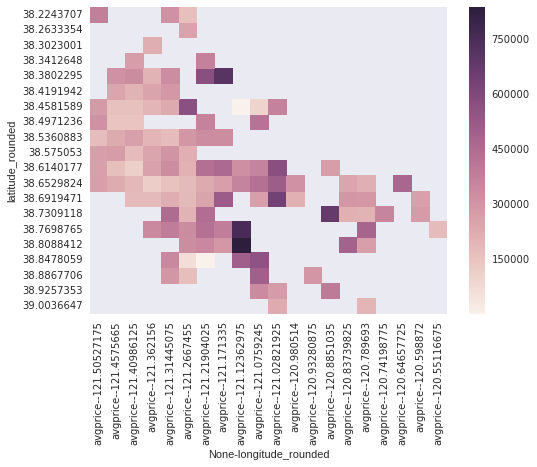

In [155]:
res2 = res.unstack(1)
seaborn.heatmap(res2)

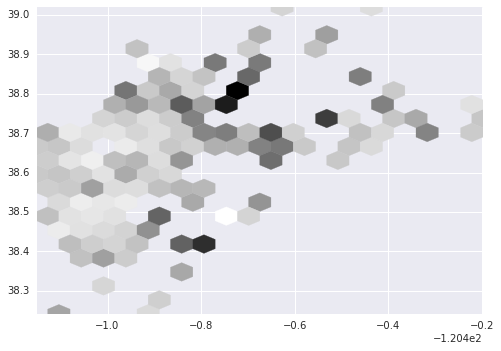

In [105]:
plt.hexbin(sacr['longitude'],sacr['latitude'],C=sacr['price'],gridsize=20)

In [114]:
seaborn.jointplot?

In [145]:
hi = pd.merge(sacr2, res.reset_index(), on=['latitude_rounded', 'longitude_rounded'])
hi

street             city    zip state  beds  baths  \
0               3526 HIGH ST       SACRAMENTO  95838    CA     2      1   
1             2796 BRANCH ST       SACRAMENTO  95815    CA     2      1   
2           2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1   
3           645 MORRISON AVE       SACRAMENTO  95838    CA     3      2   
4            2930 LA ROSA RD       SACRAMENTO  95815    CA     1      1   
5            3820 NATOMA WAY       SACRAMENTO  95838    CA     4      2   
6               3132 CLAY ST       SACRAMENTO  95815    CA     2      1   
7            483 ARCADE BLVD       SACRAMENTO  95815    CA     4      2   
8             671 SONOMA AVE       SACRAMENTO  95815    CA     3      1   
9            1069 ACACIA AVE       SACRAMENTO  95815    CA     2      1   
10          604 MORRISON AVE       SACRAMENTO  95838    CA     2      1   
11         14 ASHLEY OAKS CT       SACRAMENTO  95815    CA     3      2   
12              3924 HIGH ST       SACRAMENTO  95838    CA     2      1   
13               3845 ELM ST       SACRAMENTO  95838    CA     3      1   
14         1016 CONGRESS AVE       SACRAMENTO  95838    CA     2      2   
15          540 MORRISON AVE       SACRAMENTO  95838    CA     3      1   
16        2820 DEL PASO BLVD       SACRAMENTO  95815    CA     4      2   
17            2216 DUNLAP DR       SACRAMENTO  95821    CA     3      1   
18        1223 LAMBERTON CIR       SACRAMENTO  95838    CA     3      2   
19        1223 LAMBERTON CIR       SACRAMENTO  95838    CA     3      2   
20            508 SAMUEL WAY       SACRAMENTO  95838    CA     3      2   
21            3812 BELDEN ST       SACRAMENTO  95838    CA     2      1   
22           3812 CYPRESS ST       SACRAMENTO  95838    CA     2      1   
23           1171 SONOMA AVE       SACRAMENTO  95815    CA     2      1   
24              3104 CLAY ST       SACRAMENTO  95815    CA     2      1   
25            4288 DYMIC WAY       SACRAMENTO  95838    CA     4      3   
26             2931 HOWE AVE       SACRAMENTO  95821    CA     3      1   
27           1005 MORENO WAY       SACRAMENTO  95838    CA     3      2   
28     2328 DOROTHY JUNE WAY       SACRAMENTO  95838    CA     3      2   
29           1524 YOUNGS AVE       SACRAMENTO  95838    CA     4      2   
..                       ...              ...    ...   ...   ...    ...   
955  6222 CALLE MONTALVO CIR      GRANITE BAY  95746    CA     5      3   
956          2250 FOREBAY RD    POLLOCK PINES  95726    CA     3      1   
957             5890 TT TRAK       FORESTHILL  95631    CA     0      0   
958         636 CRESTVIEW DR  DIAMOND SPRINGS  95619    CA     3      2   
959       9967 HATHERTON WAY        ELK GROVE  95757    CA     0      0   
960          3425 MEADOW WAY          ROCKLIN  95677    CA     3      2   
961          5776 TERRACE DR          ROCKLIN  95765    CA     3      2   
962         4620 BROMWICH CT          ROCKLIN  95677    CA     4      3   
963        4478 GREENBRAE RD          ROCKLIN  95677    CA     0      0   
964          9247 DELAIR WAY        ELK GROVE  95758    CA     4      3   
965         2298 PRIMROSE LN          LINCOLN  95648    CA     3      2   
966  1515 EL CAMINO VERDE DR          LINCOLN  95648    CA     0      0   
967        2400 INVERNESS DR          LINCOLN  95648    CA     3      2   
968         6001 SHOO FLY RD      PLACERVILLE  95667    CA     0      0   
969    2674 TAM O SHANTER DR  EL DORADO HILLS  95762    CA     4      2   
970        6007 MARYBELLE LN  SHINGLE SPRINGS  95682    CA     0      0   
971            865 CONRAD CT      PLACERVILLE  95667    CA     3      2   
972             5747 KING RD           LOOMIS  95650    CA     4      2   
973      2341 BIG STRIKE TRL             COOL  95614    CA     3      2   
974        1104 HILLSDALE LN          LINCOLN  95648    CA     4      2   
975          201 KIRKLAND CT          LINCOLN  95648    CA     0      0   
976         14004 WALNUT AVE     WALNUT GROVE  